### 5.1 확률론적 선형 회귀모형

### 부트스트래핑

In [2]:
# 상수항 w0 = 0, 기울기 w1 = 42.3855
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550486)

In [3]:
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0) #상수항 결합
dfy = pd.DataFrame(y, columns=['y'])

# 추정치 w0 = -1.628364, w1 = 42.853356 로 실제와 다름
model = sm.OLS(dfy, dfX)
result = model.fit()
result.params

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    -1.628364
X1       42.853356
dtype: float64

In [4]:
# 재표본화 하여 다른 데이터 집합을 만들고 회귀분석, 해당 행위를 1000번 진행
#time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N) :
    idx = np.random.choice(len(dfy), len(dfy), replace =True)
    dfX2 = dfX.iloc[idx,:]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

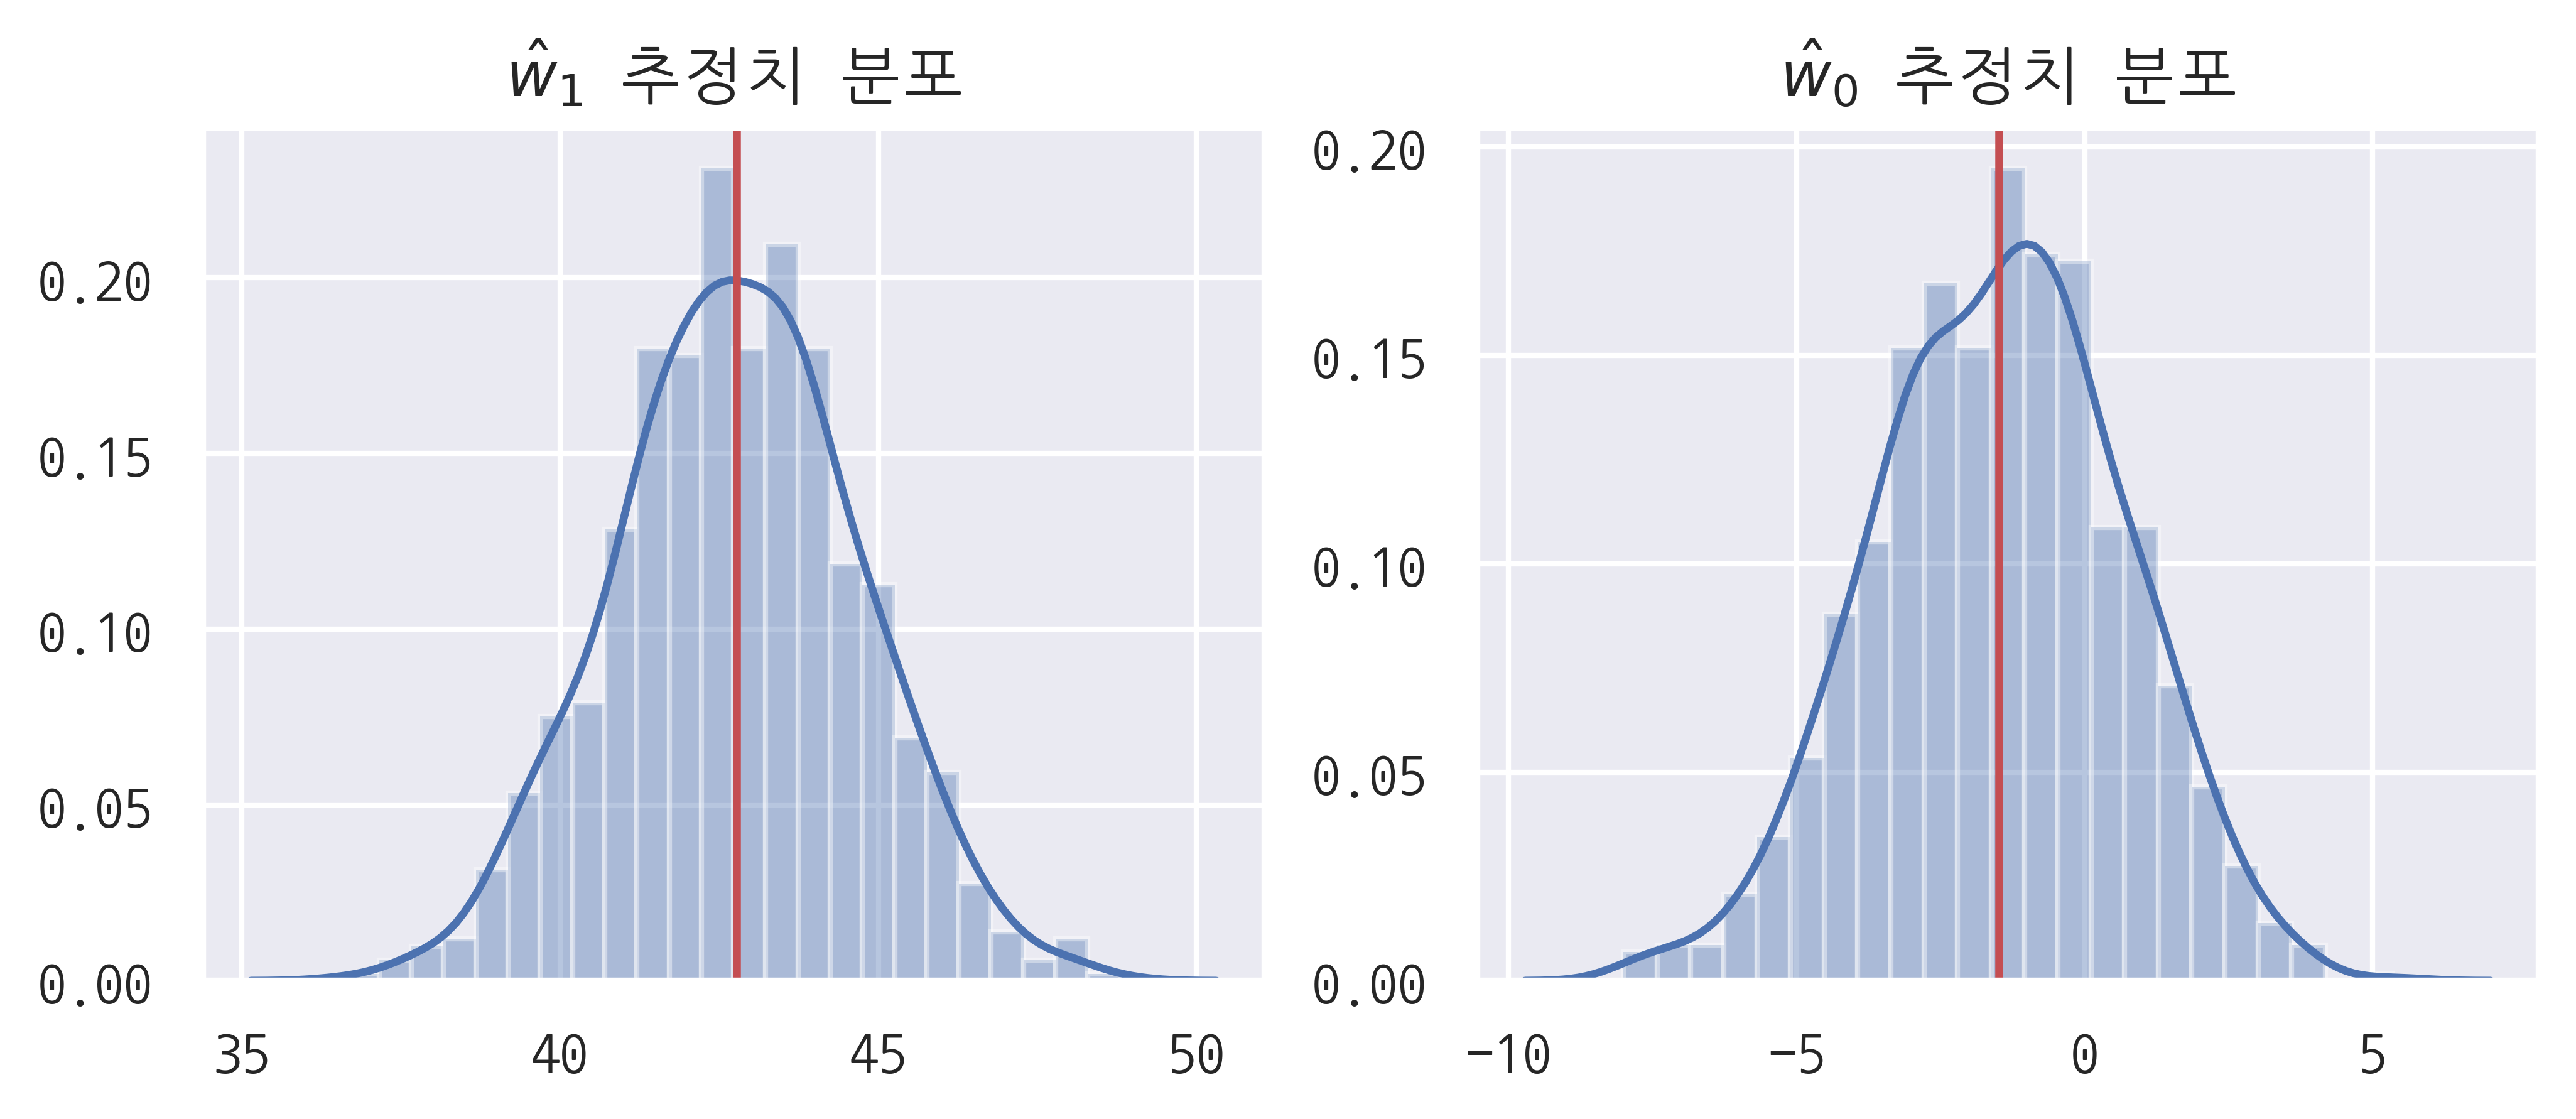

In [5]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [7]:
# 추정치 분포의 평균과 분산
params_w1.mean(), params_w1.std()

(42.77188085955352, 1.9123281054606582)

In [8]:
# summary 
# 추정치 표준편차 값 = std err
# [0.025 ~ 0.975] = +- 2시그마 값
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        17:49:20   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

#### 확률론적 선형 회귀모형

In [10]:
# (1) 선형 정규분포 가정

In [11]:
# (2) 외생성 가정

In [12]:
# (3) 조건부 독립 가정

In [13]:
# (4) 등분산성 가정

#### 최대 가능도 방법을 사용한 선형 회귀분석

#### 잔차의 분포

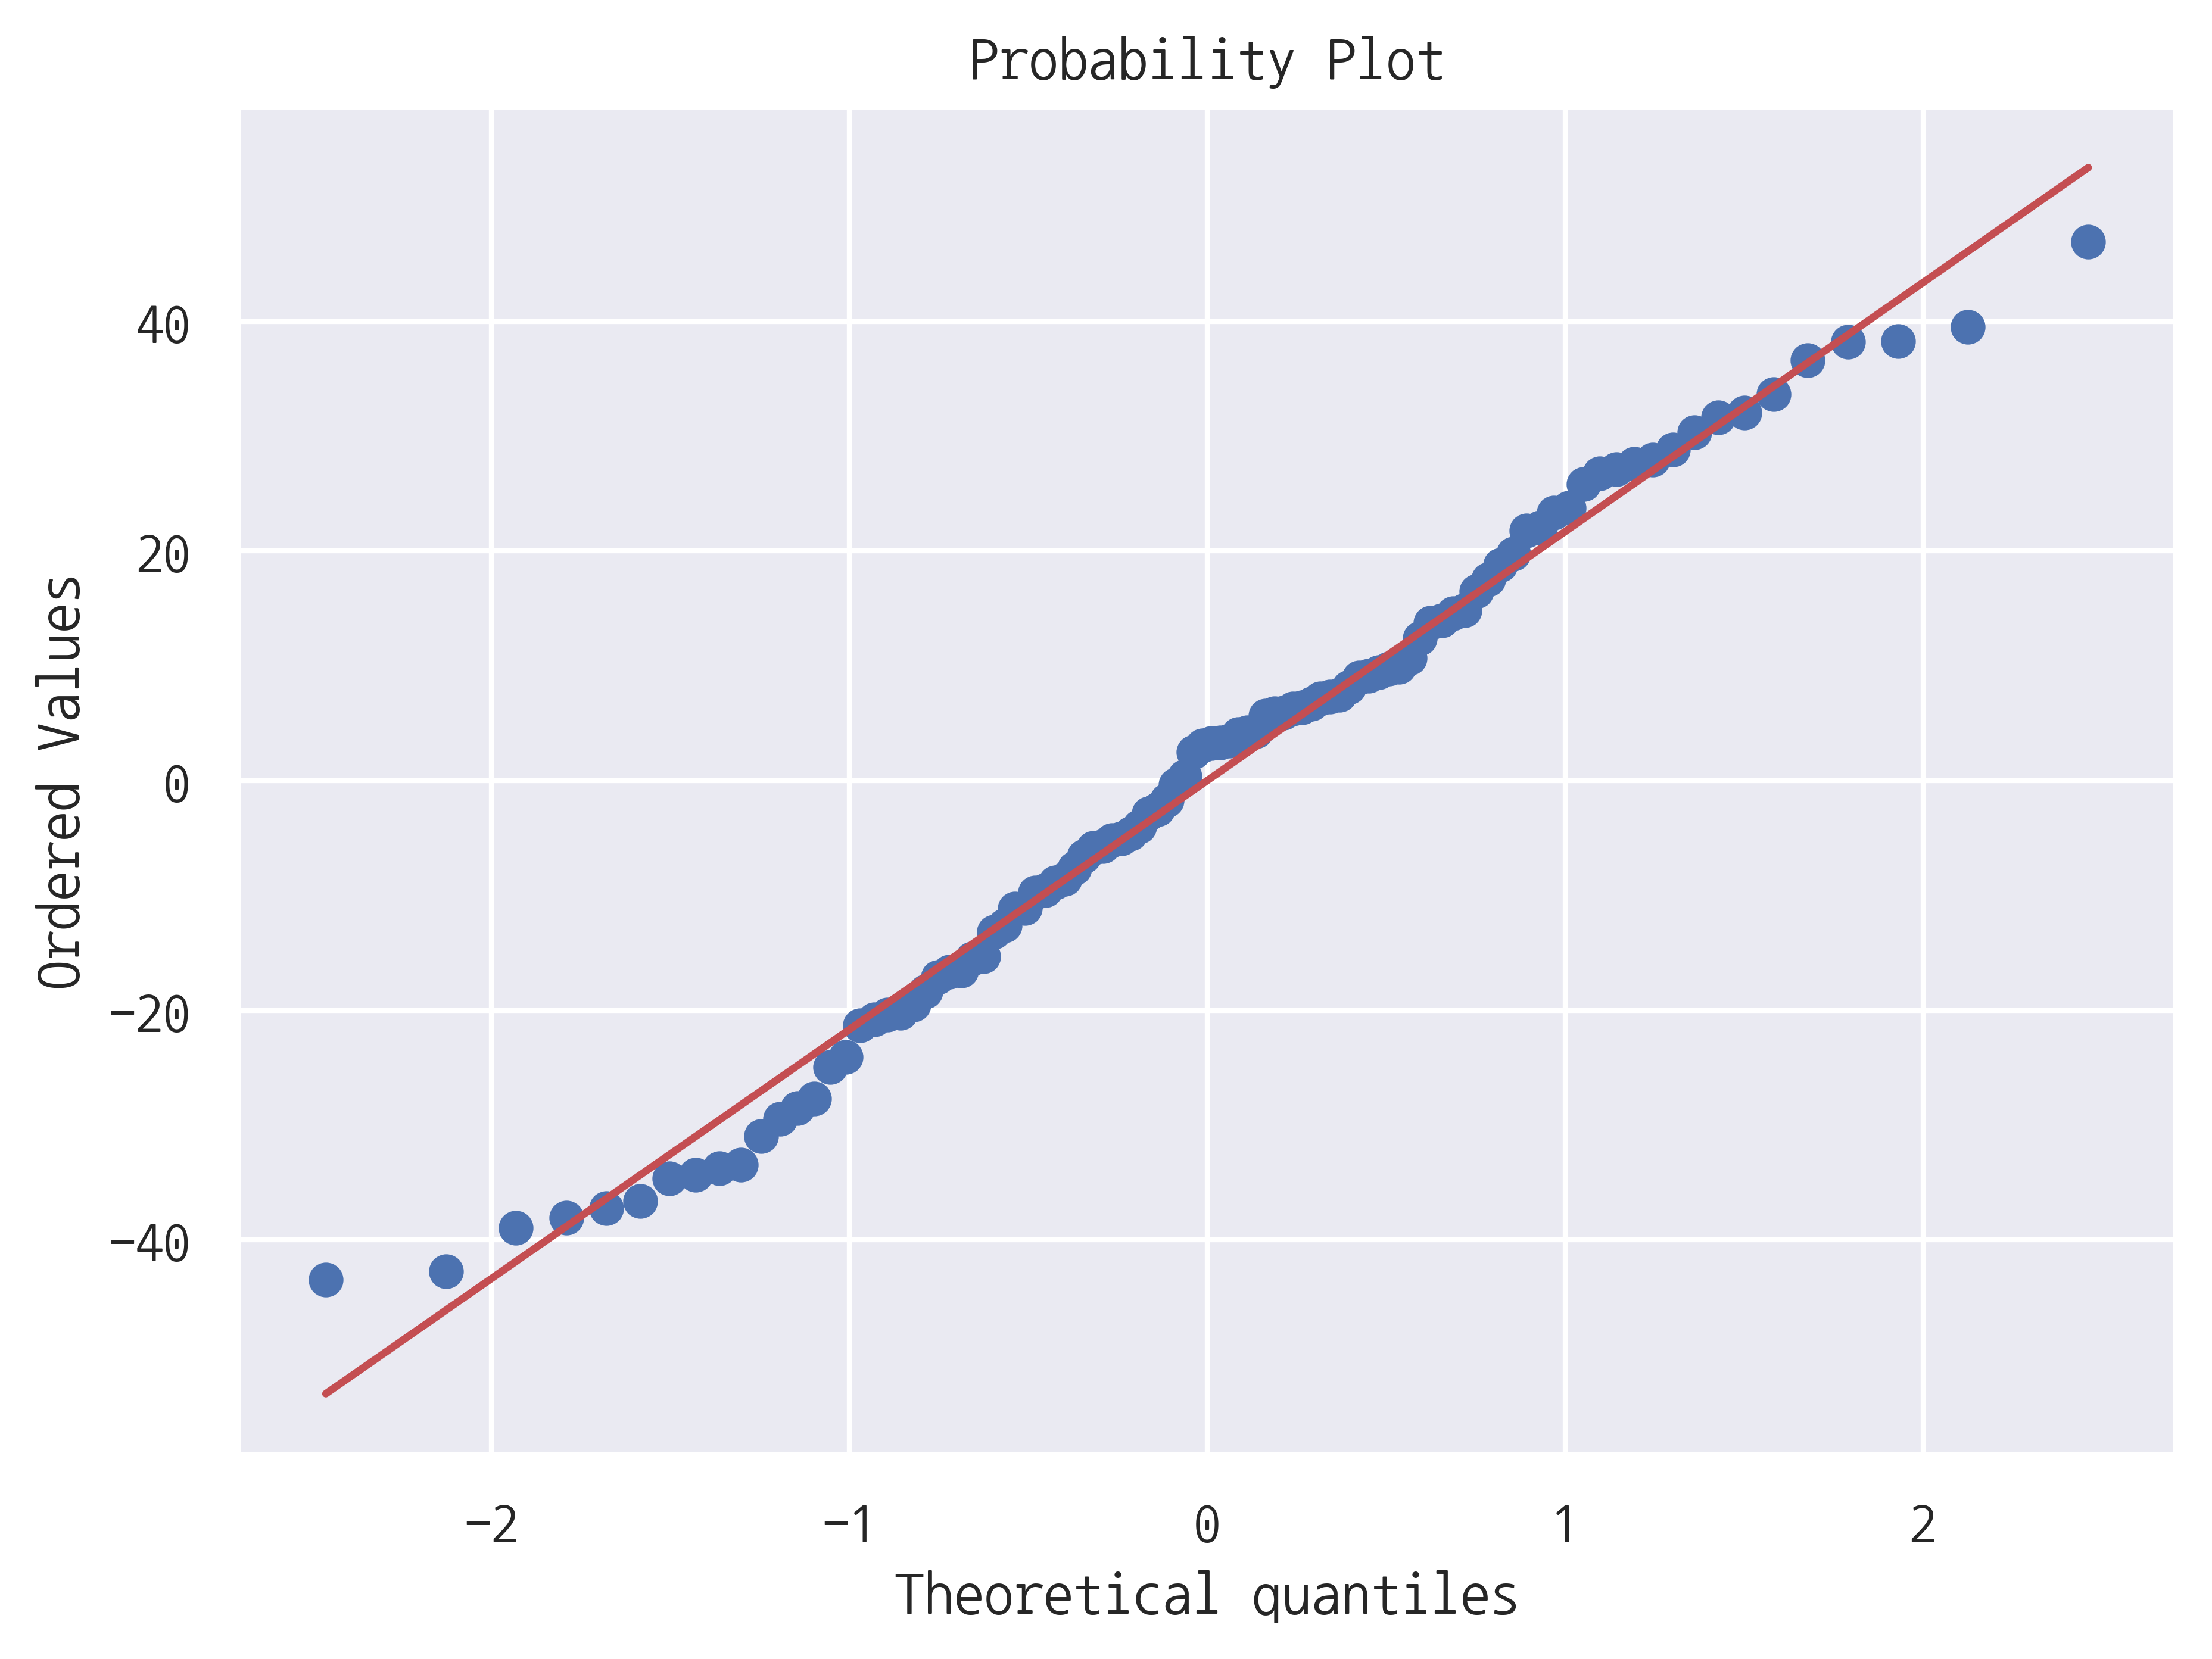

In [14]:
# 잔차e는 잡음 epsilon의 선형변환이다.
sp.stats.probplot(result.resid, plot = plt)
plt.show()

In [16]:
# 잔차의 정규성 검정을 통해 확인
# 옴니노말테스트로 확인
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2','P-value'], test):
    print("%-12s:%6.3f" % xi)

Chi^2       : 3.523
P-value     : 0.172


In [17]:
# 자크베라정규성검정으로 확인
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera','P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s:%6.3f" % xi)

Jarque-Bera : 2.059
P-value     : 0.357
Skew        :-0.073
Kurtosis    : 2.312


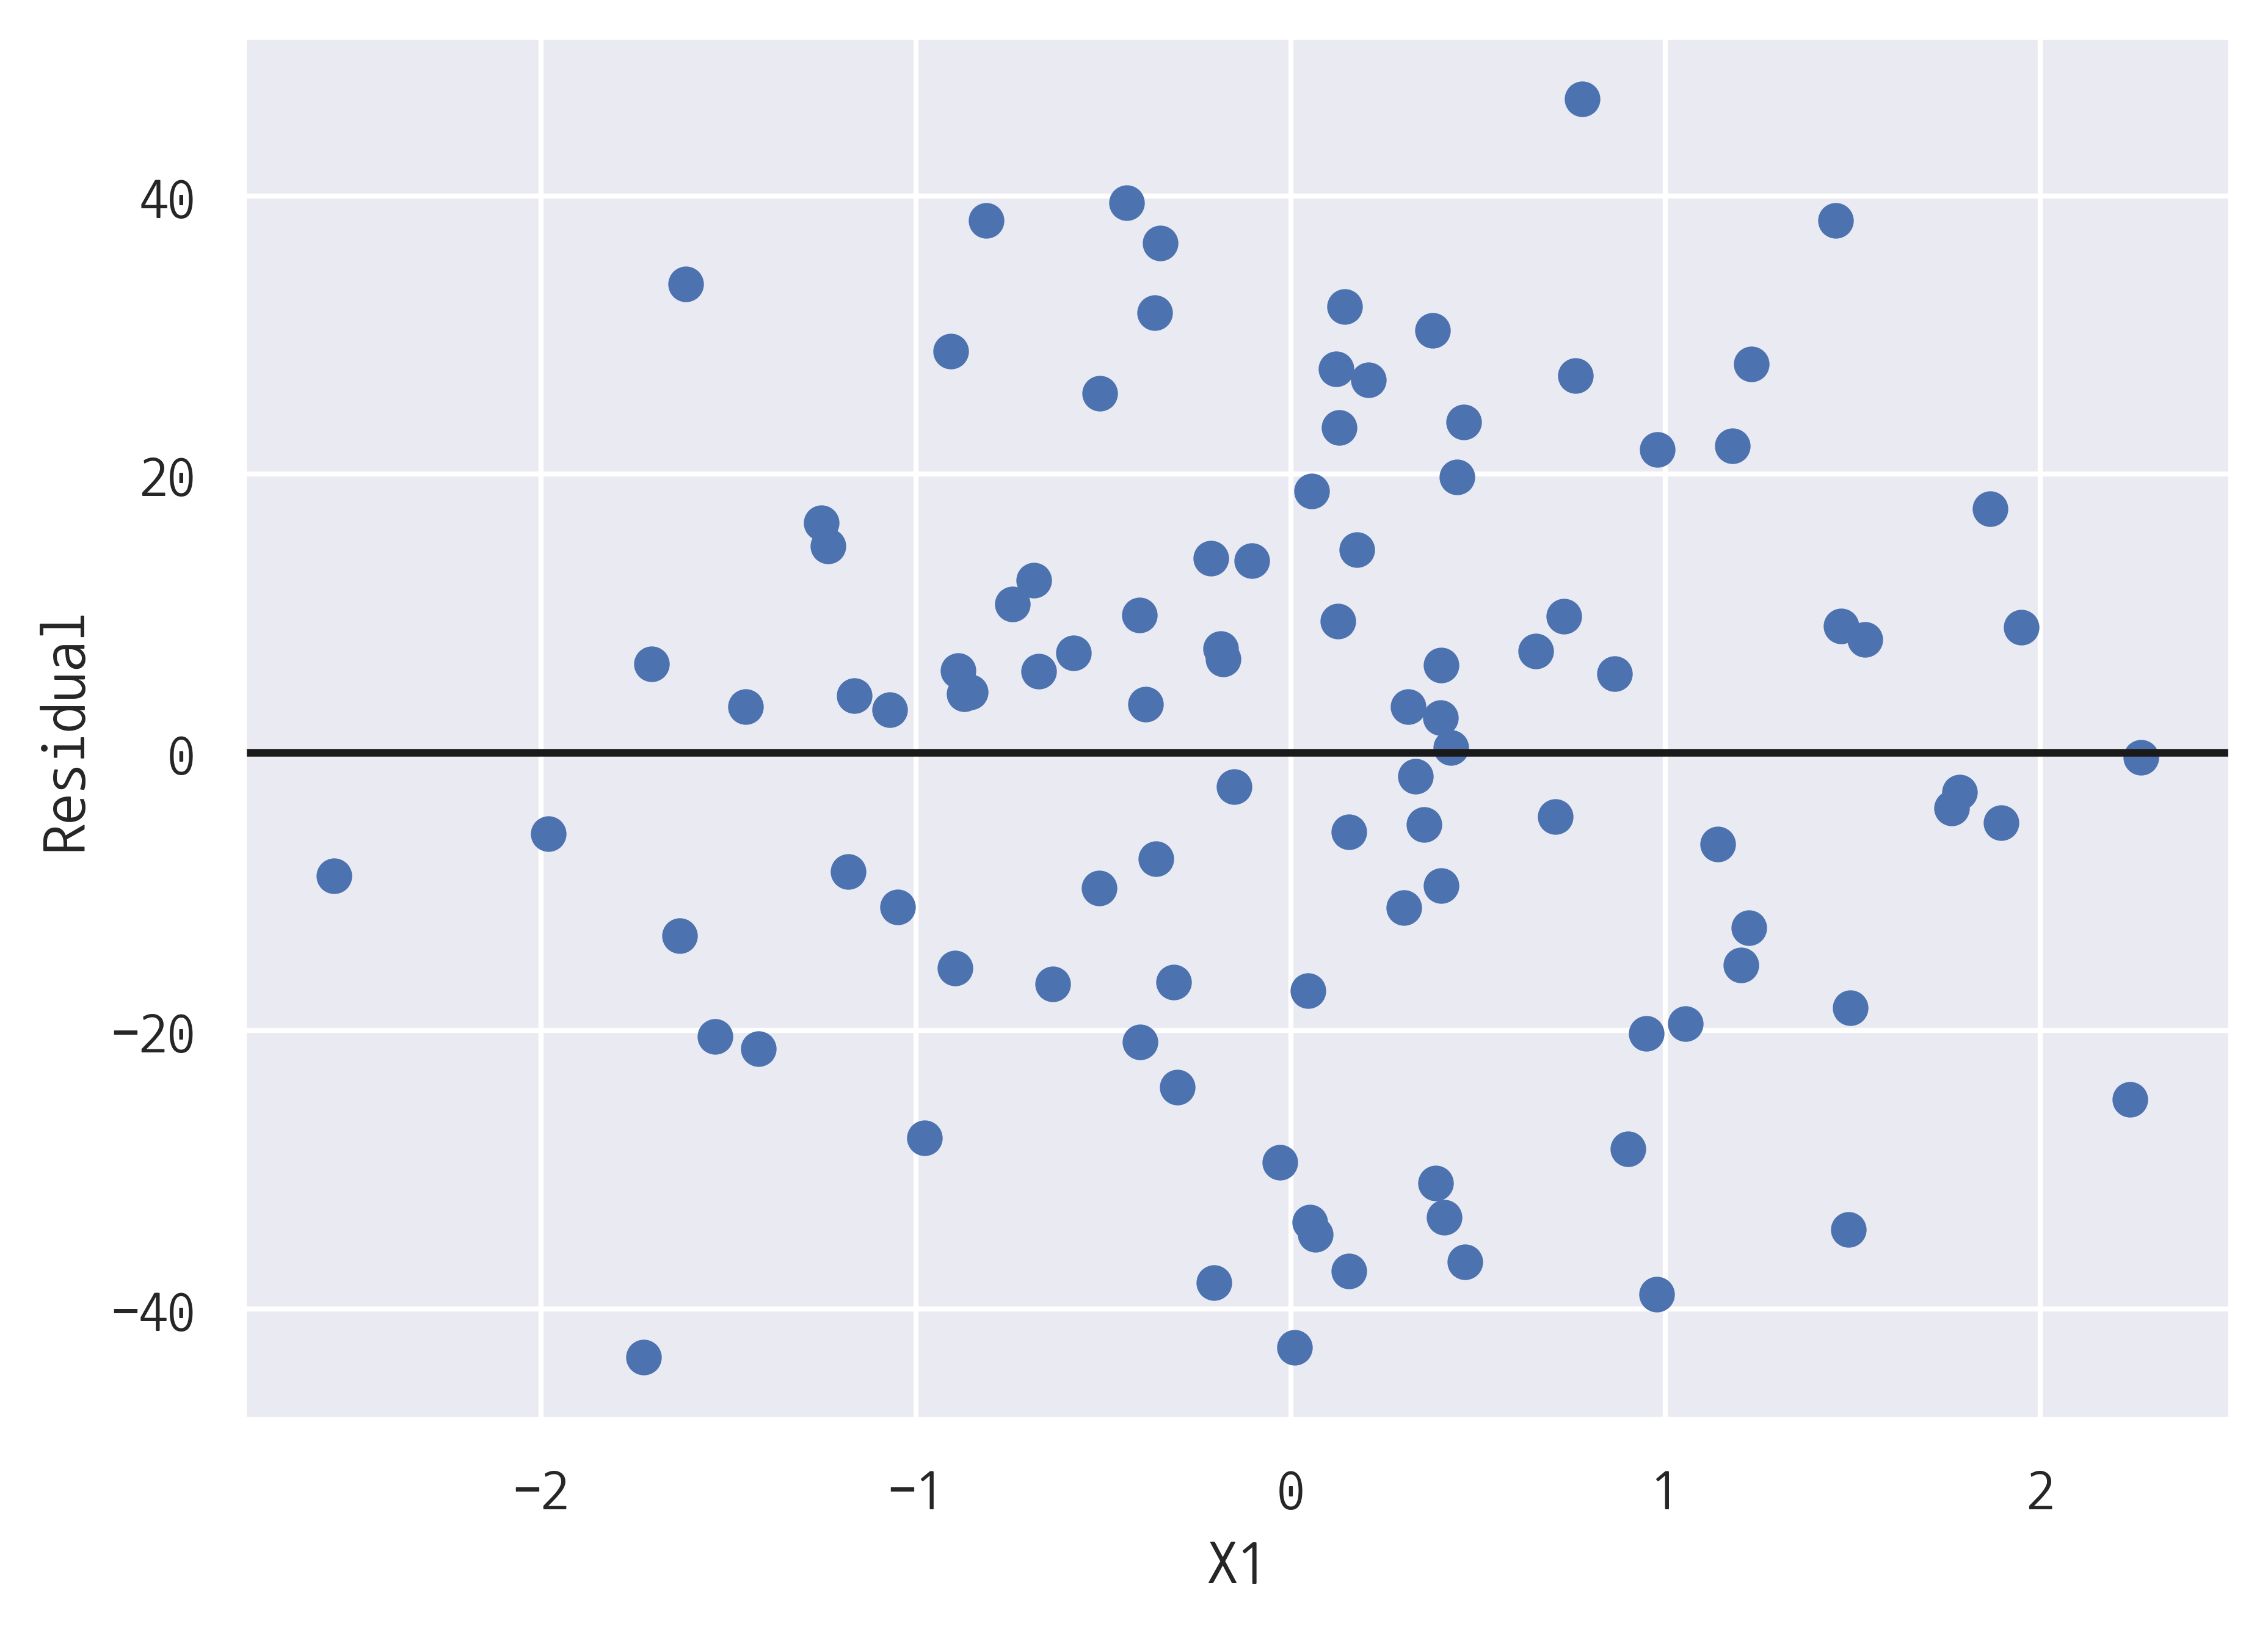

In [18]:
# 잔차의 기댓값도 x와 상관없이 0
# 잔차의 분포 확인
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

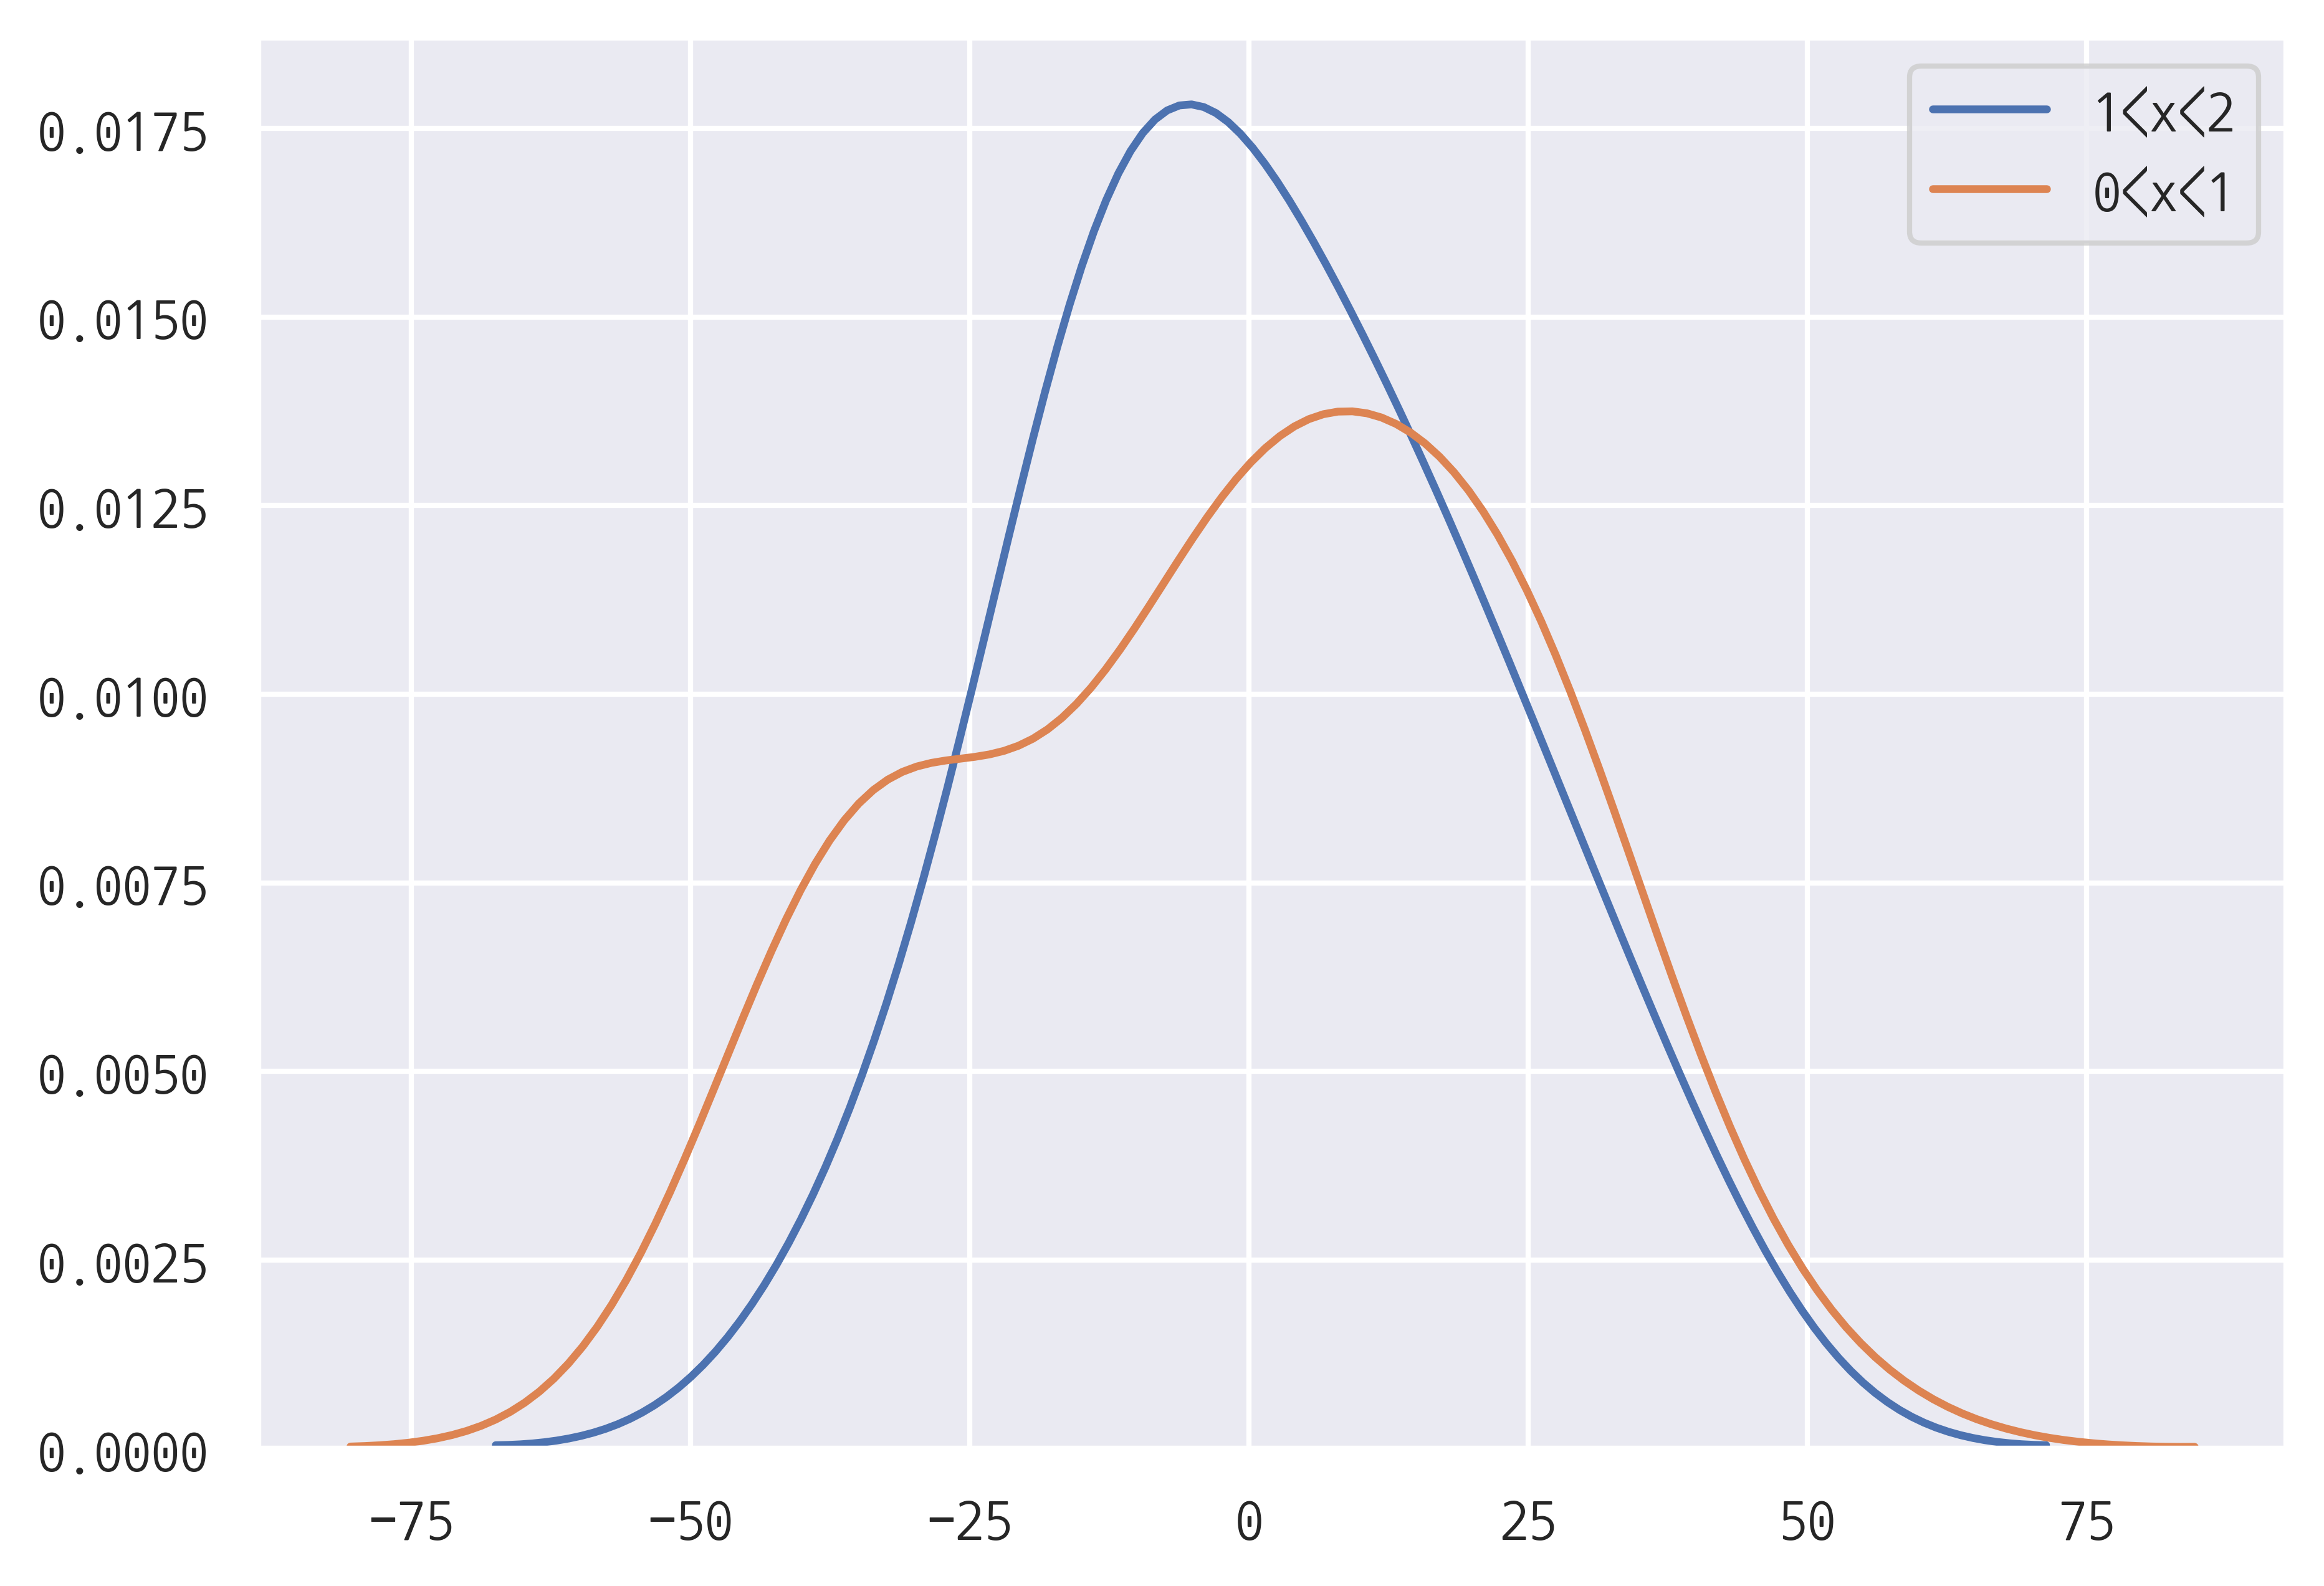

In [20]:
# x가 e에 미치는 영향, 0 < x < 1 구간과 1 < x < 2 구간의 e 분포모양
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label='1<x<2')
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label='0<x<1')
plt.legend()
plt.show()

#### 회귀 계수의 표준오차

#### 단일 계수 t-검정

In [21]:
# summary에서 std err = 모형계수의 표준오차, t = 단일계수 t-검정의 검정통계량, P > |t| = 유의확률
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        18:01:16   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [24]:
# t_test 메서드로 X1의 계수값 w1을 40으로 둔 코드
# 검정결과 문제없음 P > |t|가 기각하지 못했음
print(result.t_test('X1 = 40'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


In [30]:
# 예제 nottem 데이터의 기온
# 실질적으로 1월과 2월의 기온이 별 차이 없음
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset('nottem').data


def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d+day_one
    return date

df_nottem['date0'] = df_nottem[['time']].applymap(convert_partial_year)
df_nottem['date'] = pd.DatetimeIndex(df_nottem['date0']).round('60min') + datetime.timedelta(seconds = 3600*24)
df_nottem['month'] = df_nottem['date'].dt.strftime('%m').astype('category')
del df_nottem['date0'], df_nottem['date']

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        18:12:14   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [31]:
# 1월과 2월을 구분하는 이유가 없는듯
print(result_nottem.t_test('C(month)[01] = C(month)[02]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


In [32]:
# 반대로 2월과 3월은 구분해야 한다.
print(result_nottem.t_test('C(month)[02] = C(month)[03]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -3.0050      0.732     -4.105      0.000      -4.447      -1.563


#### 회귀분석 F검정

### 5.2 회귀분석의 기하학

### 회귀 벡터공간

### 잔차행렬과 투영행렬